In [ ]:
!wget https://dde.binghamton.edu/download/ImageDB/BOSSbase_1.01.zip

--2024-05-24 17:50:46--  https://dde.binghamton.edu/download/ImageDB/BOSSbase_1.01.zip
Resolving dde.binghamton.edu (dde.binghamton.edu)... 128.226.74.145
Connecting to dde.binghamton.edu (dde.binghamton.edu)|128.226.74.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671626159 (1.6G) [application/x-zip-compressed]
Saving to: ‘BOSSbase_1.01.zip’

BOSSbase_1.01.zip   100%[===================>]   1.56G  43.1MB/s    in 41s     

2024-05-24 17:51:27 (39.0 MB/s) - ‘BOSSbase_1.01.zip’ saved [1671626159/1671626159]



In [ ]:
!unzip /content/BOSSbase_1.01.zip

Streaming output truncated to the last 5000 lines.
  inflating: BOSSbase_1.01/5854.pgm  
  inflating: BOSSbase_1.01/1787.pgm  
  inflating: BOSSbase_1.01/2123.pgm  
  inflating: BOSSbase_1.01/7265.pgm  
  inflating: BOSSbase_1.01/4953.pgm  
  inflating: BOSSbase_1.01/4484.pgm  
  inflating: BOSSbase_1.01/7624.pgm  
  inflating: BOSSbase_1.01/8143.pgm  
  inflating: BOSSbase_1.01/2416.pgm  
  inflating: BOSSbase_1.01/1335.pgm  
  inflating: BOSSbase_1.01/9498.pgm  
  inflating: BOSSbase_1.01/1526.pgm  
  inflating: BOSSbase_1.01/7670.pgm  
  inflating: BOSSbase_1.01/914.pgm   
  inflating: BOSSbase_1.01/7314.pgm  
  inflating: BOSSbase_1.01/4787.pgm  
  inflating: BOSSbase_1.01/7190.pgm  
  inflating: BOSSbase_1.01/4448.pgm  
  inflating: BOSSbase_1.01/6431.pgm  
  inflating: BOSSbase_1.01/3482.pgm  
  inflating: BOSSbase_1.01/6612.pgm  
  inflating: BOSSbase_1.01/1835.pgm  
  inflating: BOSSbase_1.01/1080.pgm  
  inflating: BOSSbase_1.01/8246.pgm  
  inflating: BOSSbase_1.01/3403.pgm  

# Applying watermark

In [ ]:
!wget https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m&st=ddrylotw&dl=0
!mv /content/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m arial.ttf

--2024-05-24 17:52:00--  https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucae5f539c6a58abd8a693c58abd.dl.dropboxusercontent.com/cd/0/inline/CTicRKc17W-CzFePxeB_96XA5-llprB4j7oH861MjNOQPtLfz58zqd6CErOugOHtIphzWpbtcinO-vEsFc8a0EuGmXS64tyUUq1zJaEBgzqyEfnMM5j1fwD7ekrOo2KaeWv13fjXrumOZOOVuf7_thcS/file# [following]
--2024-05-24 17:52:01--  https://ucae5f539c6a58abd8a693c58abd.dl.dropboxusercontent.com/cd/0/inline/CTicRKc17W-CzFePxeB_96XA5-llprB4j7oH861MjNOQPtLfz58zqd6CErOugOHtIphzWpbtcinO-vEsFc8a0EuGmXS64tyUUq1zJaEBgzqyEfnMM5j1fwD7ekrOo2KaeWv13fjXrumOZOOVuf7_thcS/file
Resolving ucae5f539c6a58abd8a693c58abd.dl.dropboxusercontent.com (ucae5f539c6a58abd8a693c58abd.dl.dropboxusercontent.com)... 162.125.70.15, 2620:

In [ ]:
import os
import shutil

# Path to the original folder containing the files
source_folder = '/content/BOSSbase_1.01'

# Paths to the new folders
watermark_folder = '/content/BOSSbase_1.01/watermark/'
no_watermark_folder = '/content/BOSSbase_1.01/no_watermark/'

os.makedirs(watermark_folder, exist_ok=True)
os.makedirs(no_watermark_folder, exist_ok=True)

# List all files in the original folder
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
half_point = len(files) // 2

# Move the first half to the 'watermark' folder
for file in files[:half_point]:
    shutil.move(os.path.join(source_folder, file), watermark_folder)

# Move the second half to the 'no_watermark' folder
for file in files[half_point:]:
    shutil.move(os.path.join(source_folder, file), no_watermark_folder)


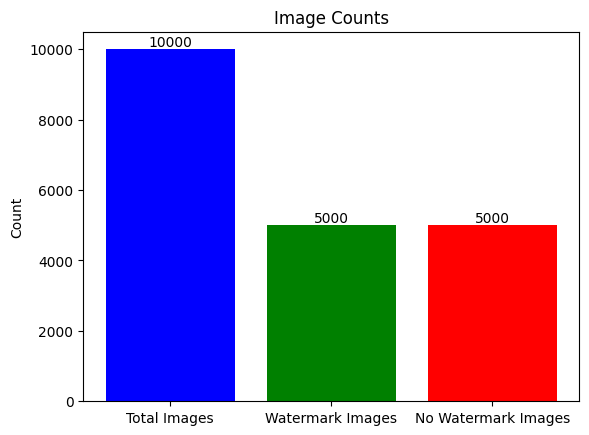

In [ ]:
import os
import matplotlib.pyplot as plt

# Define directories
watermark_dir = '/content/BOSSbase_1.01/watermark'
no_watermark_dir = '/content/BOSSbase_1.01/no_watermark'

# Count the number of files in each directory
watermark_count = len(os.listdir(watermark_dir))
no_watermark_count = len(os.listdir(no_watermark_dir))
total_count = watermark_count + no_watermark_count

# Plotting
categories = ['Total Images', 'Watermark Images', 'No Watermark Images']
counts = [total_count, watermark_count, no_watermark_count]

plt.bar(categories, counts, color=['blue', 'green', 'red'])

# Adding values on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Image Counts')
plt.ylabel('Count')
plt.show()


In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import random
from tqdm import tqdm

def apply_random_watermarks(image_path, watermark_text, output_path, spots):
    # Open an image file
    with Image.open(image_path) as img:
        # Make the image editable
        watermark_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(watermark_img)
        width, height = img.size

        for _ in range(spots):
            # Randomly choose a font size, now significantly larger
            font_size = random.randint(width // 30, width // 12)  # Doubled font size range
            font = ImageFont.truetype("arial.ttf", font_size)

            # Calculate text width and height using textbbox
            text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            # Randomly position the watermark ensuring it fits within the image
            x = random.randint(0, width - text_width - 1)
            y = random.randint(0, height - text_height - 1)

            # Draw the text on the watermark image
            draw.text((x, y), watermark_text, font=font, fill=(255, 255, 255, 170))  # Transparency set to about 66%

        # Combine the original image and the watermark image
        img = Image.alpha_composite(img.convert('RGBA'), watermark_img)

        # Save the image
        img.convert('RGB').save(output_path, "JPEG")

# Define your source and output folder paths
source_folder = '/content/BOSSbase_1.01/watermark'
output_folder = '/content/BOSSbase_1.01/with_watermark'
os.makedirs(output_folder, exist_ok=True)

# List of watermark texts
watermarks = ["إبداع", "أمل", "نور", "فكرة", "حلم", "نجاح", "شغف", "مستقبل", "أفق", "تطور"]

# Apply random watermarks to each image in the folder
for file in tqdm(os.listdir(source_folder)):
    file_path = os.path.join(source_folder, file)
    output_path = os.path.join(output_folder, file)
    if os.path.isfile(file_path):
        watermark_text = random.choice(watermarks)
        random_spots = random.randint(1, 3)  # Limit to between 1 and 3 spots
        apply_random_watermarks(file_path, watermark_text, output_path, random_spots)


100%|██████████| 5000/5000 [02:18<00:00, 36.23it/s]


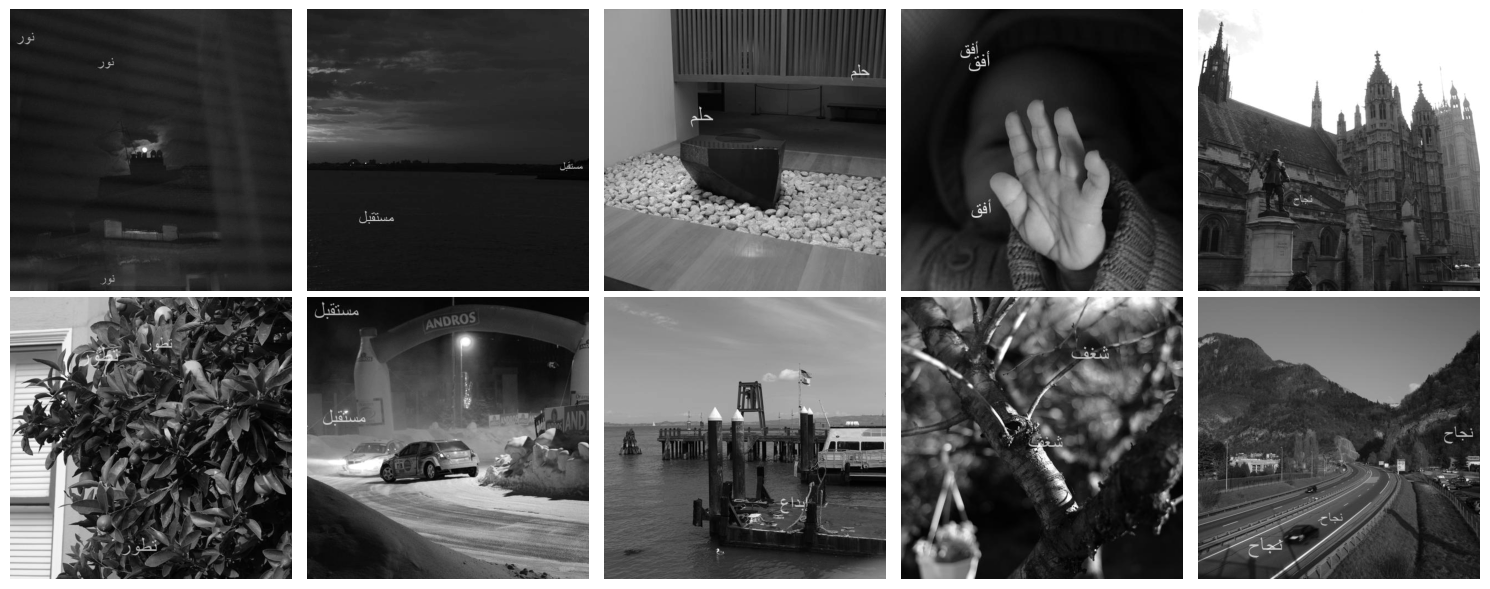

In [ ]:
import matplotlib.pyplot as plt
import os
import random
import cv2

# Define the output folder path
output_folder = '/content/BOSSbase_1.01/with_watermark'

# Get a list of image files in the output folder
image_files = [f for f in os.listdir(output_folder) if f.endswith('.pgm')]

# Select 10 random image files
random_image_files = random.sample(image_files, 10)

# Create a figure with a subplot grid of 2 rows and 5 columns
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust figure size as needed

# Loop through each selected image file and subplot
for i, file in enumerate(random_image_files):
    # Read the image using OpenCV
    img = cv2.imread(os.path.join(output_folder, file), cv2.IMREAD_GRAYSCALE)

    # Find the row and column index for the current subplot
    row = i // 5  # Integer division to find row index
    col = i % 5   # Modulo operation to find column index

    # Display the image in the corresponding subplot
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].axis('off')  # Turn off the axis ticks and labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
!rm -r /content/BOSSbase_1.01/watermark

# EDA and Preprocessing

<ipython-input-16-6f1f14387c1b>:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, len(sample_images)//2 + 1, i+1)


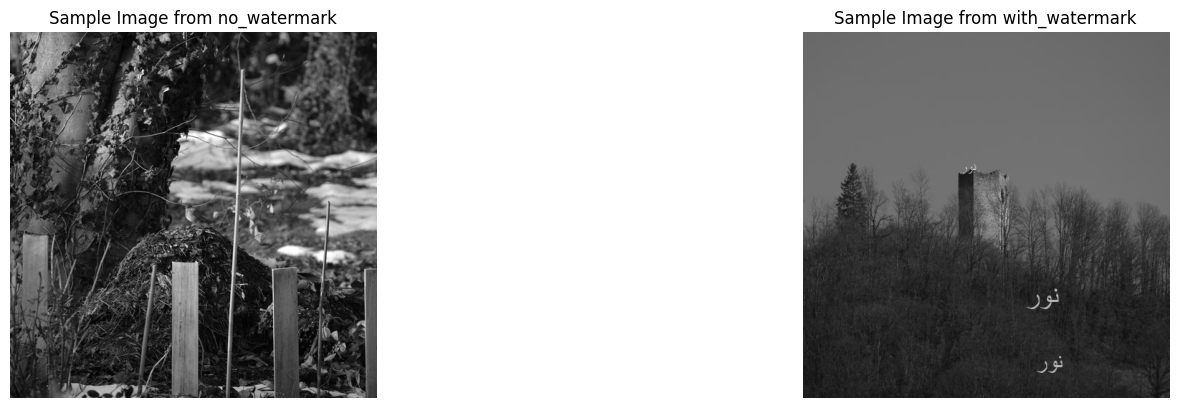

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your dataset folder containing two subfolders
dataset_folder = "/content/BOSSbase_1.01"

# Get list of folders in the dataset folder
folders = [folder for folder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, folder))]

# Count the number of images in each folder
image_counts = []
folder_names = []
sample_images = []
for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    # List files in the folder, assuming they are all images
    files = [file for file in os.listdir(folder_path) if file.endswith(('pgm'))]
    num_images = len(files)
    image_counts.append(num_images)
    folder_names.append(folder)
    # Get a random sample image from the folder
    if files:
        sample_image = random.choice(files)
        sample_image_path = os.path.join(folder_path, sample_image)
        sample_images.append(sample_image_path)
    else:
        sample_images.append(None)

# Create bar plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(folder_names, image_counts)
plt.xlabel('Folder Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot sample images
plt.subplot(1, 2, 2)
for i, image_path in enumerate(sample_images):
    plt.subplot(2, len(sample_images)//2 + 1, i+1)
    if image_path:
        img = mpimg.imread(image_path)
        plt.imshow(img, cmap='gray')  # Use gray colormap for pgm images
        plt.axis('off')
        plt.title(f'Sample Image from {folders[i]}')

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

import tensorflow.keras.utils as ku

class ImageDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size=32, resize=(512, 512), num_classes=2):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.resize = resize
        self.num_classes = num_classes

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        images = [self.load_image(img_path) for img_path in batch_paths]
        batch_labels = ku.to_categorical(batch_labels, num_classes=self.num_classes)
        return np.array(images), np.array(batch_labels)

    def load_image(self, path):
        img = Image.open(path)
        img = img.resize(self.resize)
        img_array = np.array(img)
        if img_array.ndim == 2:
            img_array = np.stack((img_array,) * 3, axis=-1)
        return img_array.astype('float32') / 255.0


# Collect all image paths and their labels
root_folder = '/content/BOSSbase_1.01'
image_paths = []
labels = []
for class_idx, class_name in enumerate(os.listdir(root_folder)):
    class_folder = os.path.join(root_folder, class_name)
    for image_name in os.listdir(class_folder):
        image_paths.append(os.path.join(class_folder, image_name))
        labels.append(class_idx)

# Split the data into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create data generators
train_generator = ImageDataGenerator(train_paths, train_labels, batch_size=32, resize=(512, 512))
test_generator = ImageDataGenerator(test_paths, test_labels, batch_size=32, resize=(512, 512))


# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model_cnn = Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    MaxPooling2D((2, 2)),

    # Another convolutional layer, increasing the filter count to 64
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output to feed into a dense layer
    Flatten(),

    # Dense layer with 512 units and ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation for classification
    Dense(2, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model_cnn.summary()

# Train the model
history = model_cnn.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 128)       0

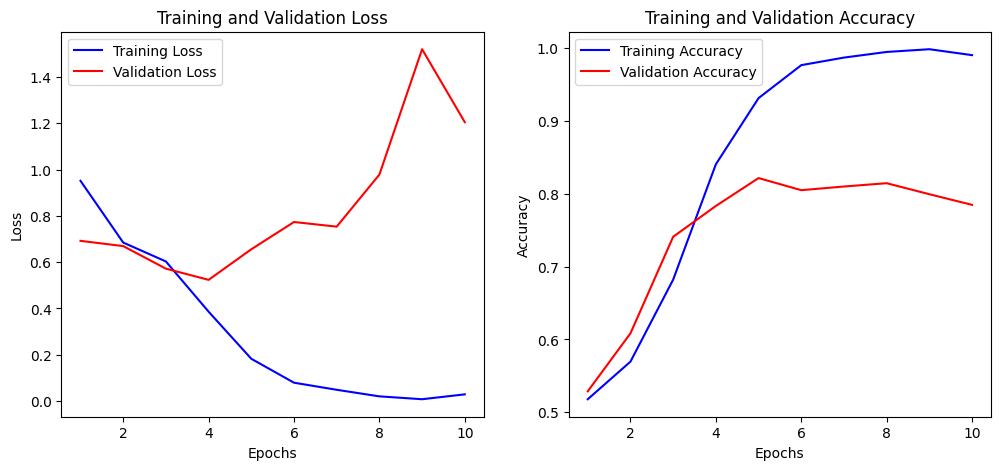

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_cnn.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


62/62 [==============================] - 16s 248ms/step - loss: 1.2051 - accuracy: 0.7848
Test Loss: 1.2050665616989136
Test Accuracy: 0.7847782373428345


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Generate predictions for all test images
predictions = []
true_labels = []

for images, labels in test_generator:
    preds = model_cnn.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Ensure predictions and true labels are numpy arrays for compatibility with sklearn functions
predictions = np.array(predictions)
true_labels = np.array(true_labels)


1/1 [==============================] - 0s 114ms/step


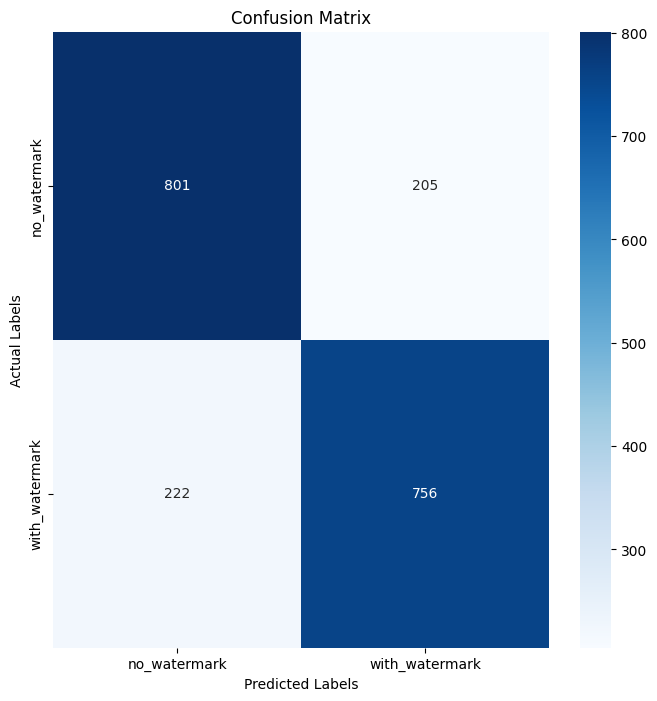

                precision    recall  f1-score   support

  no_watermark       0.78      0.80      0.79      1006
with_watermark       0.79      0.77      0.78       978

      accuracy                           0.78      1984
     macro avg       0.78      0.78      0.78      1984
  weighted avg       0.78      0.78      0.78      1984



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

class_names = sorted(os.listdir(root_folder))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predictions, target_names=class_names)
print(report)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')  # 'macro' averages without taking label imbalance into account
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7847782258064516
Precision: 0.7848358717245294
Recall: 0.7846143994926149
F1 Score: 0.7846674483526768


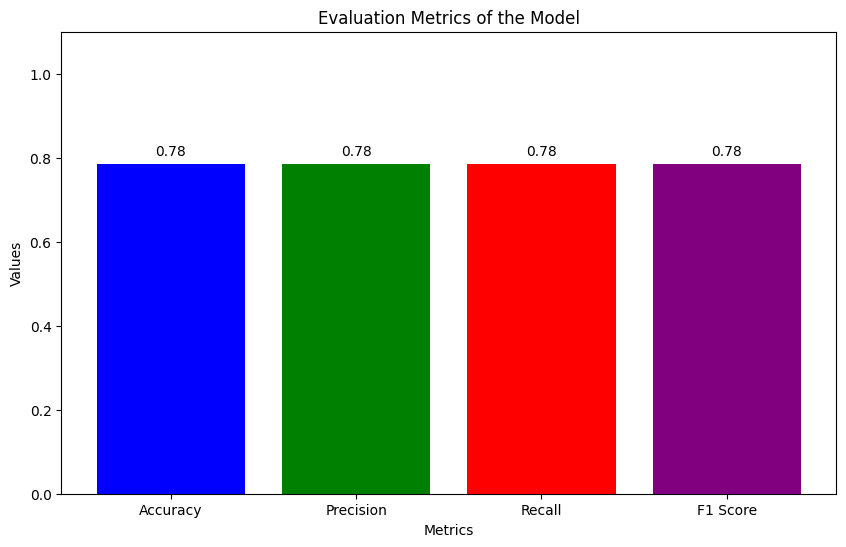

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics of the Model')
plt.ylim([0, 1.1])  # Assuming all metric values range from 0 to 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')  # Add text to the bars

plt.show()


Errors for Non-Watermarked: 205
Errors for Watermarked: 222


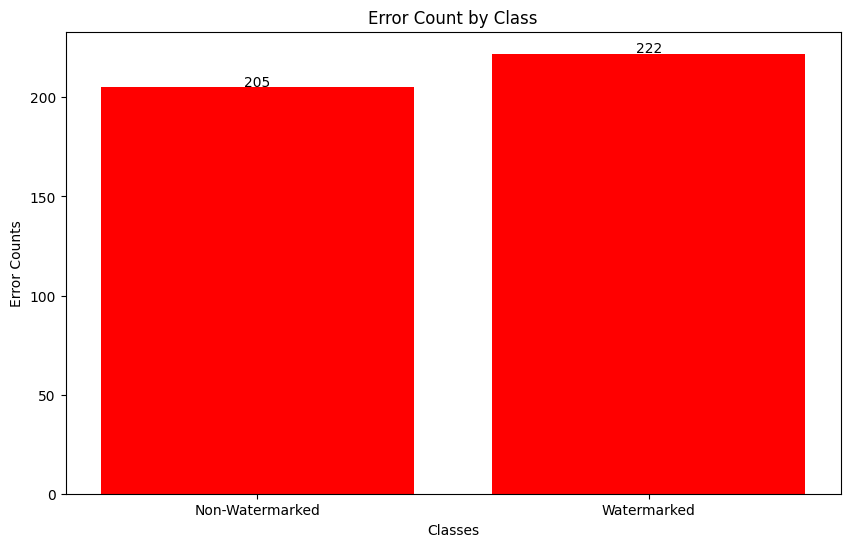

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have an array of class names corresponding to indices
class_names = ['Non-Watermarked', 'Watermarked']  # Update this as per your classes

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Calculate error counts per class
error_counts = np.sum(cm, axis=1) - np.diag(cm)  # Sum each row and subtract the diagonal (correct predictions)

# Print error counts for verification
for i, name in enumerate(class_names):
    print(f"Errors for {name}: {error_counts[i]}")

plt.figure(figsize=(10, 6))
plt.bar(class_names, error_counts, color='red')
plt.xlabel('Classes')
plt.ylabel('Error Counts')
plt.title('Error Count by Class')
for i, v in enumerate(error_counts):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')  # Add text on top of each bar for clarity

plt.show()


# ResNet50V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50V2 model without the top (fully connected) layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model_ResNet50V2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model_ResNet50V2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model_ResNet50V2.summary()

# Train the model
history = model_ResNet50V2.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


94668760/94668760 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 16, 16, 2048)      23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24614914 (93.90 MB)
Trainable params: 105

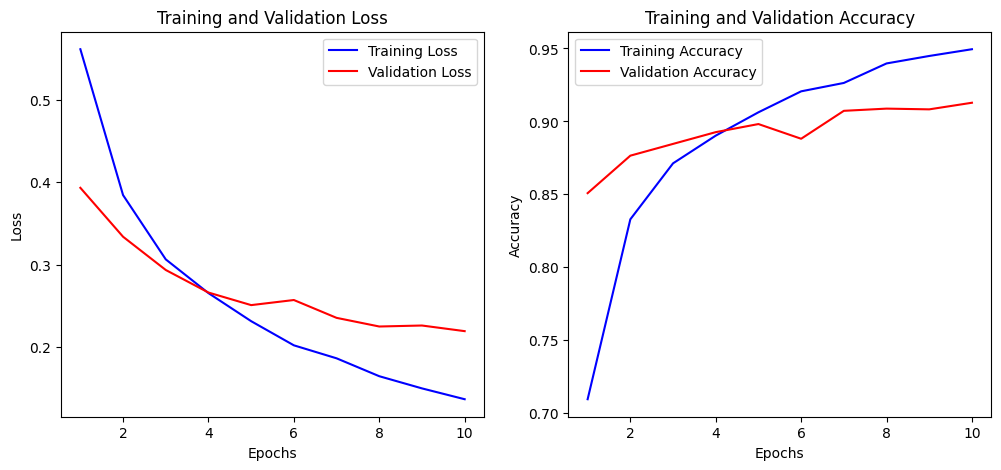

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_ResNet50V2.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


62/62 [==============================] - 25s 405ms/step - loss: 0.2197 - accuracy: 0.9128
Test Loss: 0.21965883672237396
Test Accuracy: 0.9128023982048035


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Generate predictions for all test images
predictions = []
true_labels = []

for images, labels in test_generator:
    preds = model_ResNet50V2.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Ensure predictions and true labels are numpy arrays for compatibility with sklearn functions
predictions = np.array(predictions)
true_labels = np.array(true_labels)


1/1 [==============================] - 0s 126ms/step


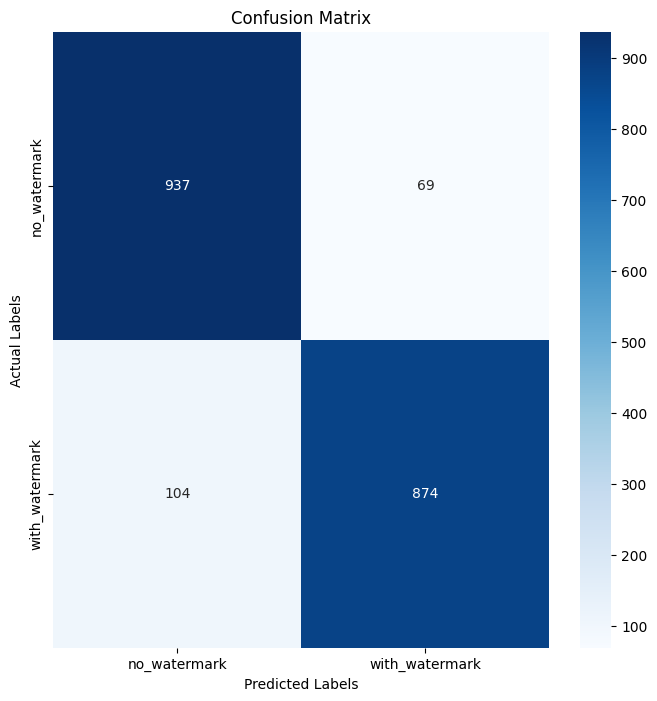

                precision    recall  f1-score   support

  no_watermark       0.90      0.93      0.92      1006
with_watermark       0.93      0.89      0.91       978

      accuracy                           0.91      1984
     macro avg       0.91      0.91      0.91      1984
  weighted avg       0.91      0.91      0.91      1984



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

class_names = sorted(os.listdir(root_folder))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predictions, target_names=class_names)
print(report)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')  # 'macro' averages without taking label imbalance into account
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9128024193548387
Precision: 0.9134626648860149
Recall: 0.9125360312562254
F1 Score: 0.9127144076716679


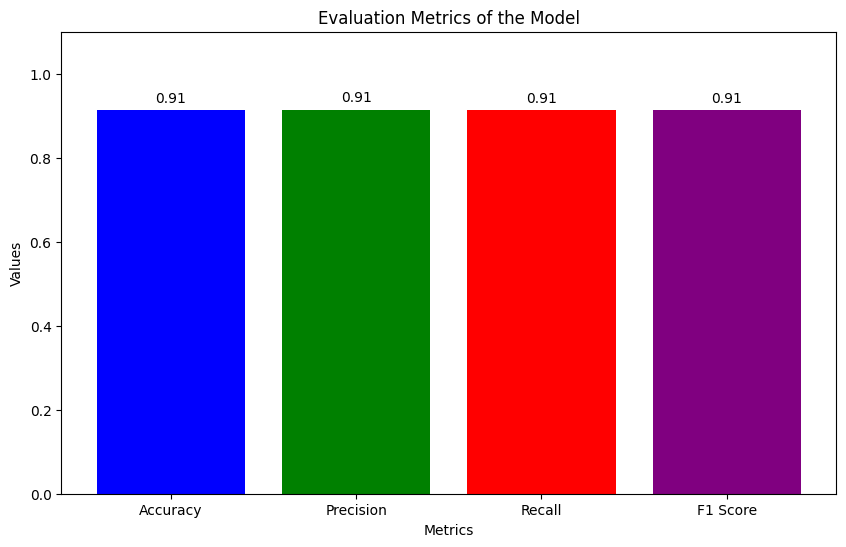

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics of the Model')
plt.ylim([0, 1.1])  # Assuming all metric values range from 0 to 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')  # Add text to the bars

plt.show()


Errors for Non-Watermarked: 69
Errors for Watermarked: 104


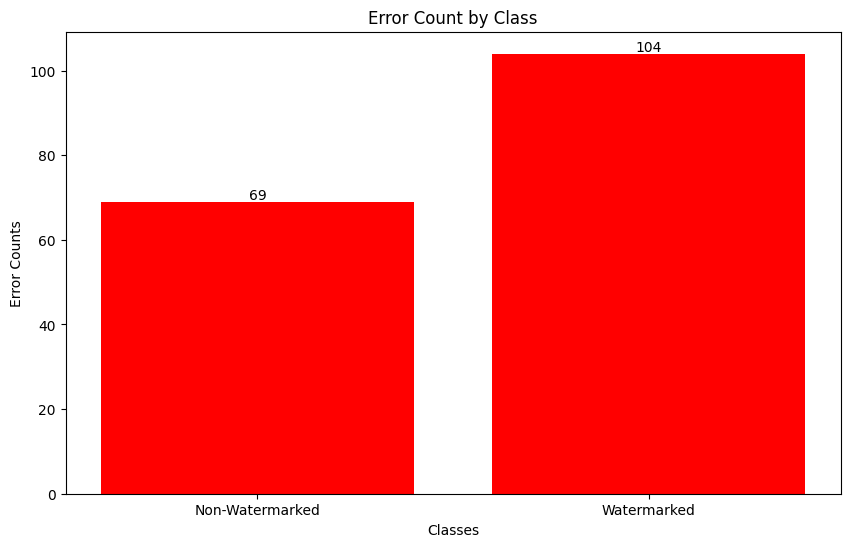

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have an array of class names corresponding to indices
class_names = ['Non-Watermarked', 'Watermarked']  # Update this as per your classes

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Calculate error counts per class
error_counts = np.sum(cm, axis=1) - np.diag(cm)  # Sum each row and subtract the diagonal (correct predictions)

# Print error counts for verification
for i, name in enumerate(class_names):
    print(f"Errors for {name}: {error_counts[i]}")

plt.figure(figsize=(10, 6))
plt.bar(class_names, error_counts, color='red')
plt.xlabel('Classes')
plt.ylabel('Error Counts')
plt.title('Error Count by Class')
for i, v in enumerate(error_counts):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')  # Add text on top of each bar for clarity

plt.show()


# Mobilenet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 16, 16, 1280)      2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                         

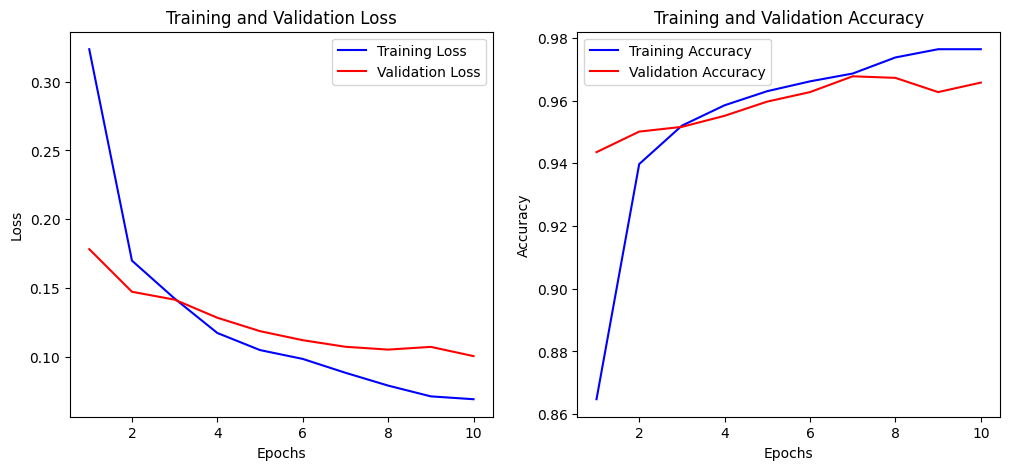

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


62/62 [==============================] - 16s 256ms/step - loss: 0.1004 - accuracy: 0.9657
Test Loss: 0.10035772621631622
Test Accuracy: 0.9657257795333862


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Generate predictions for all test images
predictions = []
true_labels = []

for images, labels in test_generator:
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Ensure predictions and true labels are numpy arrays for compatibility with sklearn functions
predictions = np.array(predictions)
true_labels = np.array(true_labels)


1/1 [==============================] - 0s 152ms/step


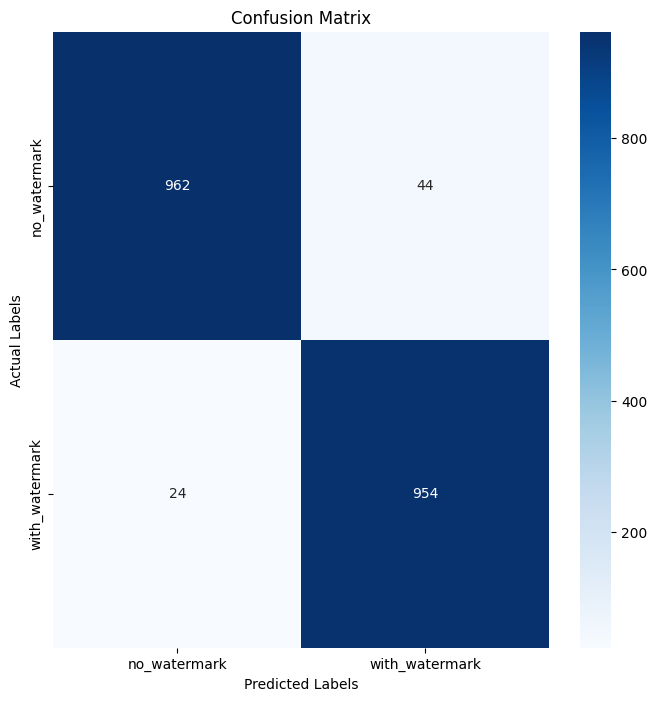

                precision    recall  f1-score   support

  no_watermark       0.98      0.96      0.97      1006
with_watermark       0.96      0.98      0.97       978

      accuracy                           0.97      1984
     macro avg       0.97      0.97      0.97      1984
  weighted avg       0.97      0.97      0.97      1984



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

class_names = sorted(os.listdir(root_folder))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predictions, target_names=class_names)
print(report)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')  # 'macro' averages without taking label imbalance into account
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9657258064516129
Precision: 0.9657855264281097
Recall: 0.9658612740733513
F1 Score: 0.965725249174837


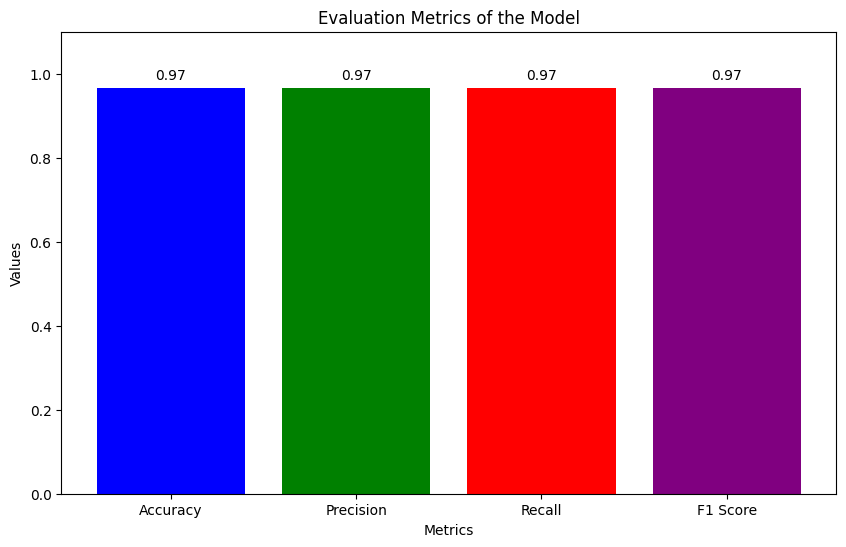

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics of the Model')
plt.ylim([0, 1.1])  # Assuming all metric values range from 0 to 1
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')  # Add text to the bars

plt.show()


Errors for Non-Watermarked: 44
Errors for Watermarked: 24


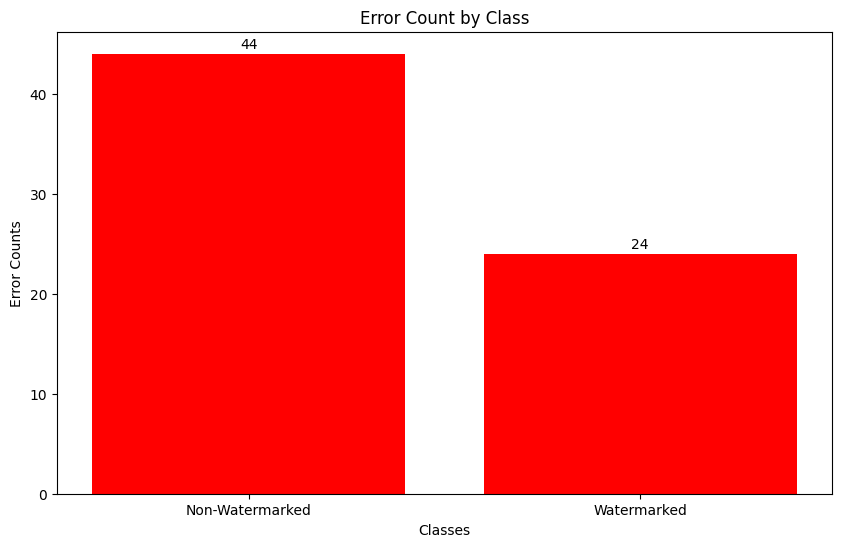

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have an array of class names corresponding to indices
class_names = ['Non-Watermarked', 'Watermarked']  # Update this as per your classes

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Calculate error counts per class
error_counts = np.sum(cm, axis=1) - np.diag(cm)  # Sum each row and subtract the diagonal (correct predictions)

# Print error counts for verification
for i, name in enumerate(class_names):
    print(f"Errors for {name}: {error_counts[i]}")

plt.figure(figsize=(10, 6))
plt.bar(class_names, error_counts, color='red')
plt.xlabel('Classes')
plt.ylabel('Error Counts')
plt.title('Error Count by Class')
for i, v in enumerate(error_counts):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')  # Add text on top of each bar for clarity

plt.show()


# Comparison

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to generate predictions and true labels from the model
def evaluate_model(model, test_generator):
    predictions = []
    true_labels = []
    for images, labels in test_generator:
        preds = model.predict(images)
        predictions.extend(np.argmax(preds, axis=1))
        true_labels.extend(np.argmax(labels, axis=1))
    return np.array(predictions), np.array(true_labels)

# Models list
models = {
    "Mobilenet Model": model,
    "CNN Model": model_cnn,
    "ResNet50V2 Model": model_ResNet50V2
}

# DataFrame to hold the results
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Evaluate each model
for name, model in models.items():
    predictions, true_labels = evaluate_model(model, test_generator)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='macro')
    recall = recall_score(true_labels, predictions, average='macro')
    f1 = f1_score(true_labels, predictions, average='macro')

    # Create a temporary DataFrame with results for the current model
    temp_df = pd.DataFrame({
        "Model": [name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1]
    })

    # Append results to the main DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Print the results DataFrame
print(results_df)


1/1 [==============================] - 0s 130ms/step
              Model  Accuracy  Precision    Recall  F1 Score
0   Mobilenet Model  0.965726   0.965786  0.965861  0.965725
1         CNN Model  0.784778   0.784836  0.784614  0.784667
2  ResNet50V2 Model  0.912802   0.913463  0.912536  0.912714


<ipython-input-46-ae549b8bad32>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0], palette=palette)
<ipython-input-46-ae549b8bad32>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1], palette=palette)
<ipython-input-46-ae549b8bad32>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1, 0], palette=palette)
<ipython-input-46-ae549b8bad32>:42: FutureWarning: 

Passing `palette` without a

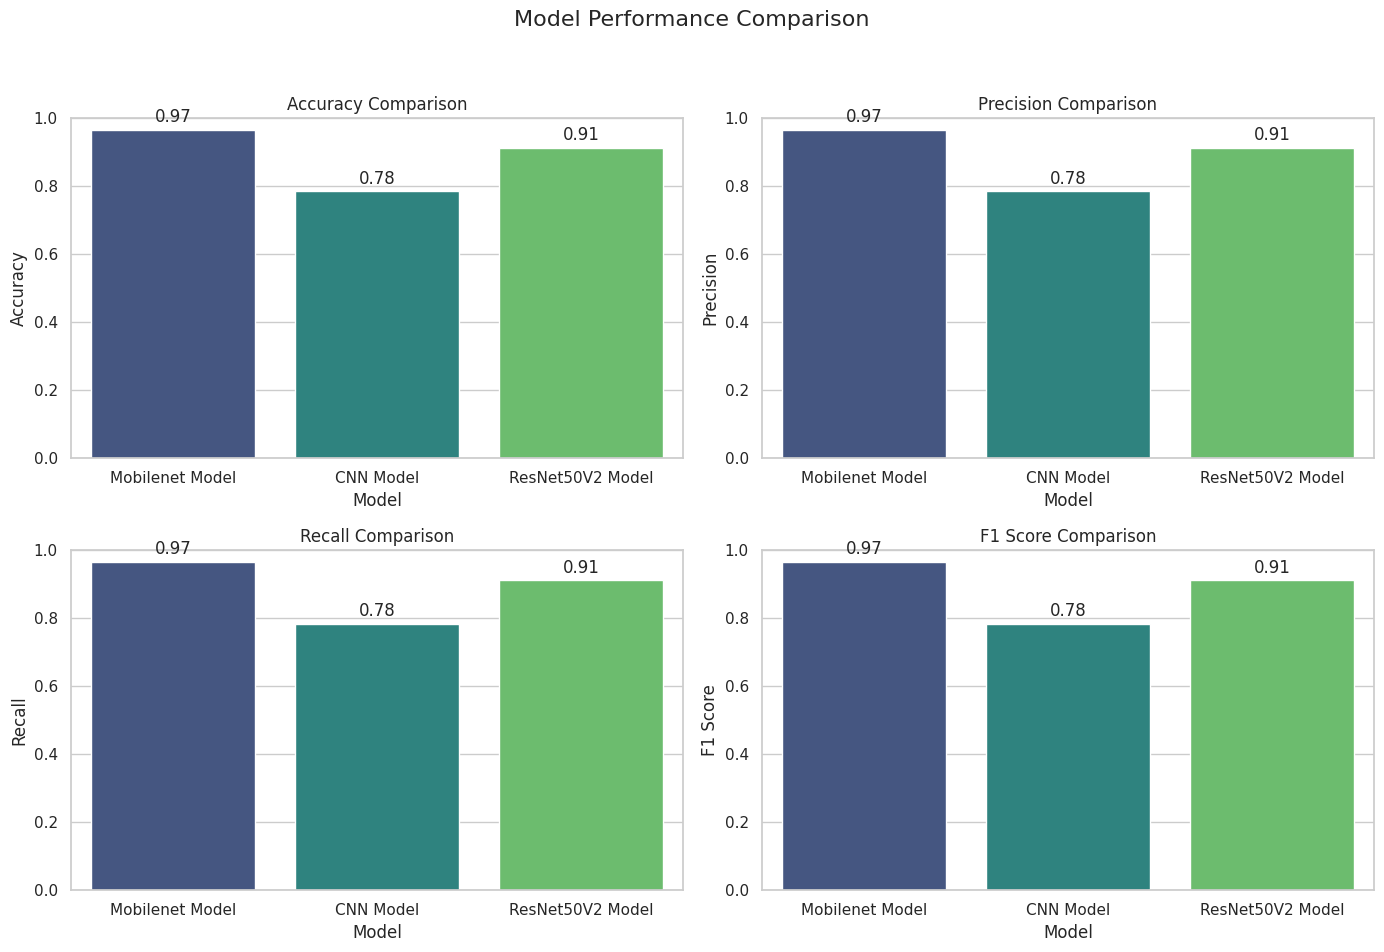

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Define a palette to ensure a variety of colors
palette = sns.color_palette("viridis", n_colors=3)

# Function to add annotations to the bars
def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

# Plotting Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylim(0, 1)  # Adjust as per your data
add_annotations(axes[0, 0])

# Plotting Precision
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylim(0, 1)  # Adjust as per your data
add_annotations(axes[0, 1])

# Plotting Recall
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylim(0, 1)  # Adjust as per your data
add_annotations(axes[1, 0])

# Plotting F1 Score
sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylim(0, 1)  # Adjust as per your data
add_annotations(axes[1, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()
